In [2]:
# 2018-06-19
# A. Pendleton
# Plotting PCA of breeds+Zoey at Shannon SNP array sites

In [3]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput
import glob
from scipy import stats
import re
from matplotlib_venn import venn3, venn3_circles
from collections import OrderedDict
import seaborn as sns

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)
# TO REMOVE TOP AND RIGHT AXIS OF PLOTS
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

#### Need to make the pop fam file so each breed is a population

In [4]:
shannonBreedFile = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/input/Shannon_Data/ShannonOnly_Breeds.txt'
#outfile = shannonBreedFile.replace('.txt','_ThreePerBreed.txt')
outfile = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/input/Merged_Shannon_Zoey/ShannonOnly_Breeds_ThreePerBreed.txt'
outFile = open(outfile,'w')
#Dont write out NGSD and boxers to this
outfile2 = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/input/Merged_Shannon_Zoey/ShannonOnly_Breeds_ThreePerBreed_NoNGSDBoxers.txt'
outFile2 = open(outfile2,'w')

sampleCount = 0

breeds = {}
sampleBreedDict = {}

for line in open(shannonBreedFile,'r'):
    line=line.rstrip().split('\t')
    sampleID = line[0]
    breed = line[2].replace(' ','_')
    sampleCount += 1
    
    sampleBreedDict[sampleID] = breed
    
    #Skip 'mixes'
    if 'Mix' in breed:
        continue
    
    #If not in dictionary yet, then create empty array
    if breed not in breeds.keys():
        breeds[breed] = []
        
    #Only want three per breed UNLESS it's a great dane, we want two PLUS zoey (to add later during merging)
    if len(breeds[breed]) == 3 and 'Dane' not in breed:
        continue
    if len(breeds[breed]) == 2 and 'Dane' in breed:
        continue

    #else
    breeds[breed].append(sampleID)
    sampleBreedDict[sampleID] = breed
breeds['Great_Dane'].append('zoey')
sampleBreedDict['zoey'] = 'Great_Dane'
sampleCount +=1
    
print('Parsed infile info for %i samples' % sampleCount)
print('Data for %i breeds added to dictionary' % len(breeds.keys()))

for breed in breeds.keys():
    for ID in breeds[breed]:
        outFile.write('%s\t%s\n' % (ID,ID))
        if 'Guinea' in breed or 'Boxer' in breed:
            continue
        outFile2.write('%s\t%s\n' % (ID,ID))

outFile.close()
outFile2.close()


Parsed infile info for 3829 samples
Data for 154 breeds added to dictionary


## Read in PCA Data

In [9]:
wkDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/'
plotDir = wkDir + 'plots/'
#All breeds
eigFile = wkDir + 'results/' + 'ShannonZoey_BreedsOnly_geno0.05_biallelic_strandedfilt_autosomes_0.05missing_ReducedSamples.eigenvec'

#No NGSD or Boxer
#eigFile = wkDir + 'results/' + 'ShannonZoey_BreedsOnly_geno0.05_biallelic_strandedfilt_autosomes_0.05missing_ReducedSamples_NoNGSDBoxers.eigenvec'

pcaDict = {}
pcaDICT = {}
varianceList = []

for i in range(1,20):
    pcaDICT[i] = []

for line in open(eigFile,'r'):
    line = line.rstrip().split()
    if 'eig' in line[0]:
        for i in range(1,20):
            varianceList.append(float(line[i]))
    else:
        sampleID = line[0].split(':')[0]
        pcaDict[sampleID] = []
        for i in range(1,20):
            pcaDict[sampleID].append(float(line[i]))
            pcaDICT[i]
print('Added PCA results for %i samples' % len(pcaDict.keys()))


Added PCA results for 408 samples


# Plotting PCA

### Get Breed Colors

In [6]:
wkDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/PCA/'
plotDir = wkDir + 'plots/'
colorDict = {}

for line in open(plotDir + 'BreedColors.txt','r'):
    if 'Breed' in line: #skip header
        continue
    line=line.rstrip().split()
    breed = line[0]
    color = line[1]
    colorDict[breed] = color


### Plotting the PCA

IndexError: list index out of range

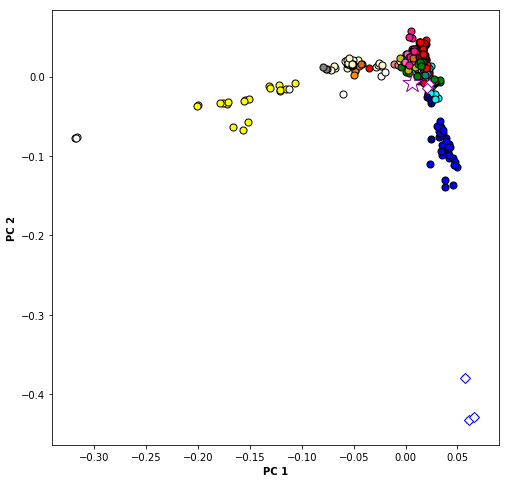

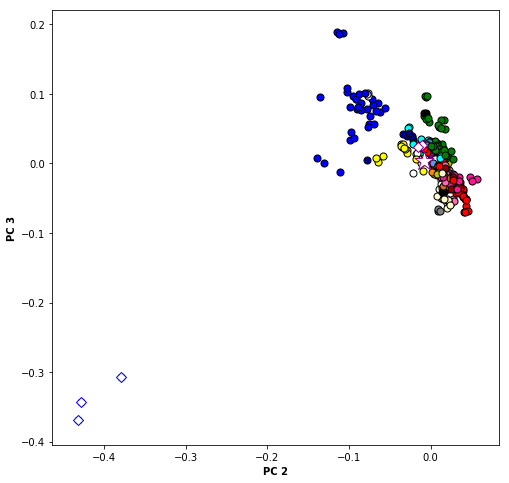

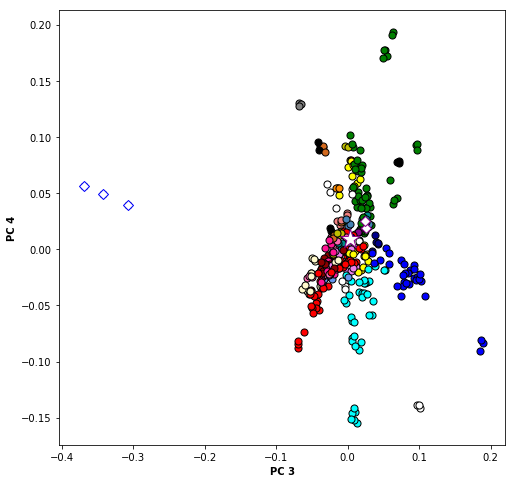

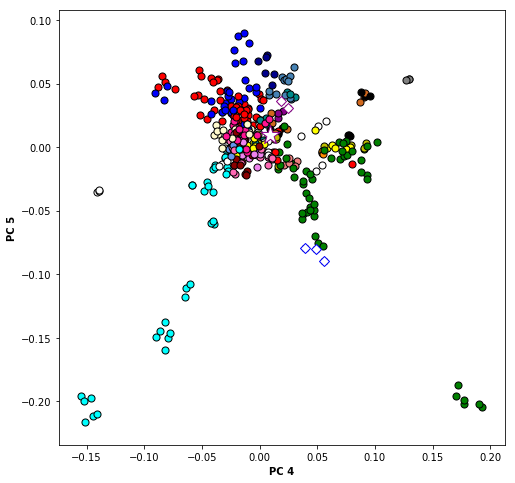

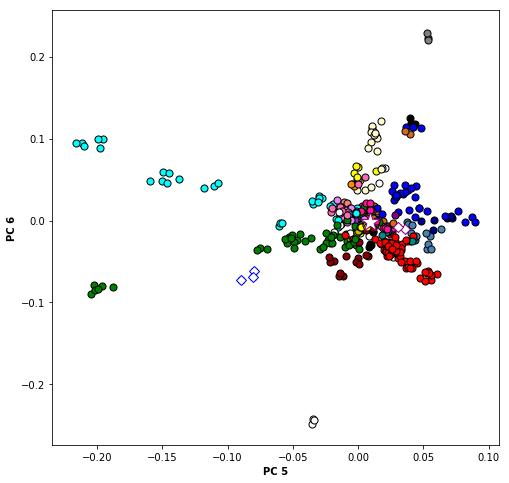

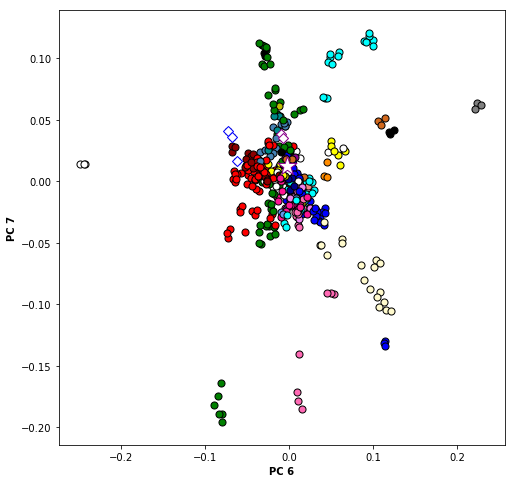

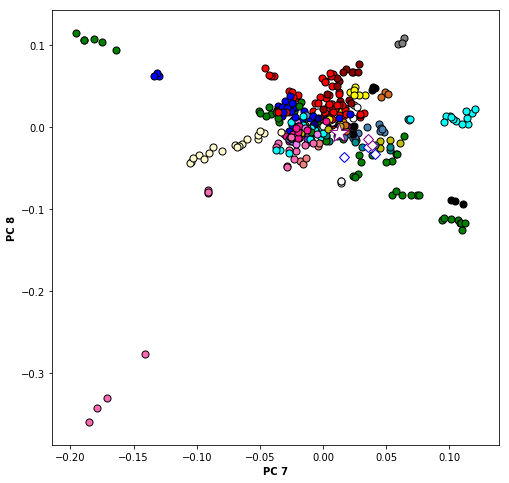

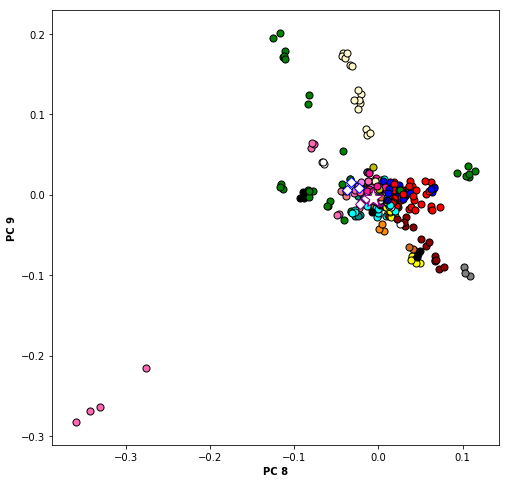

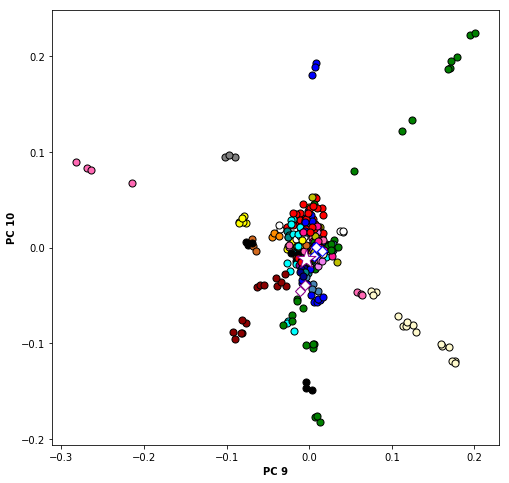

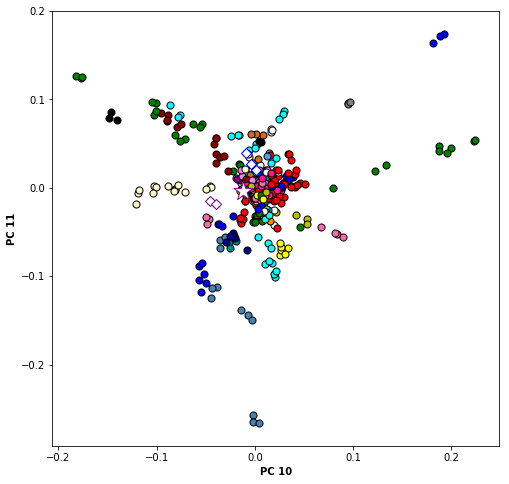

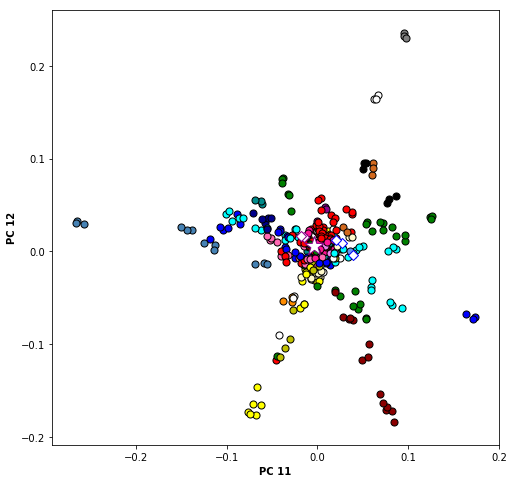

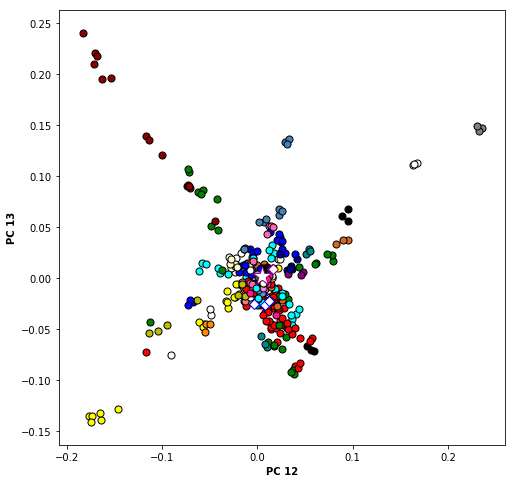

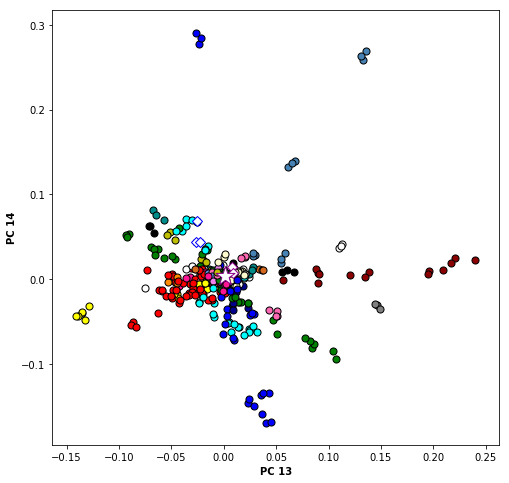

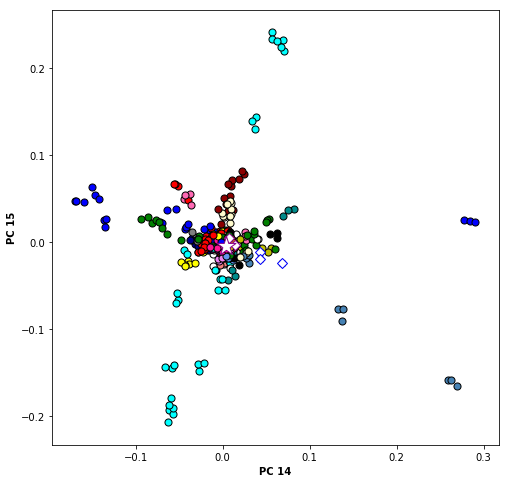

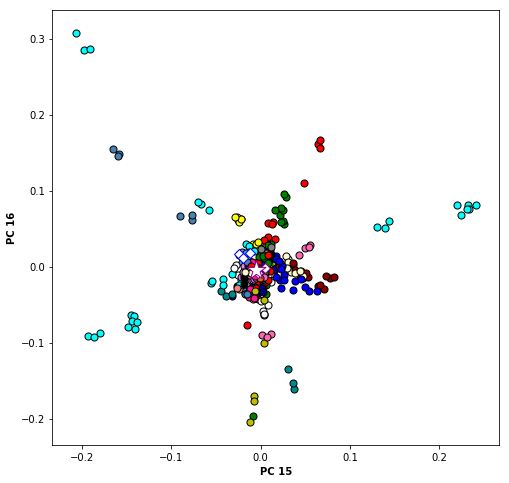

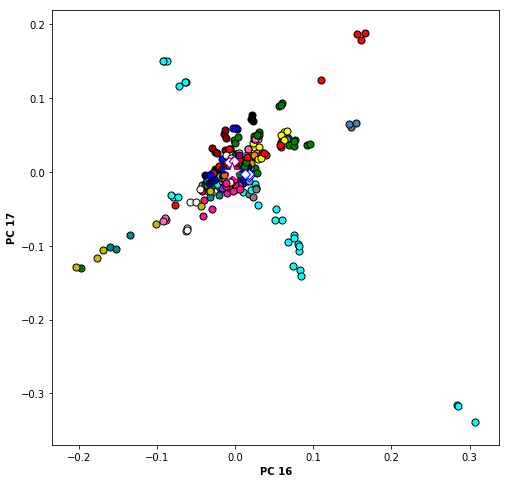

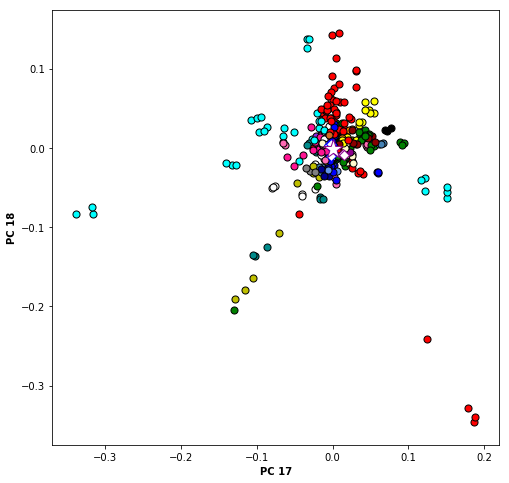

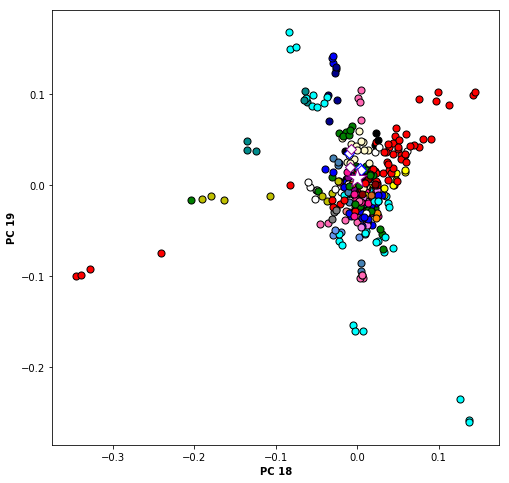

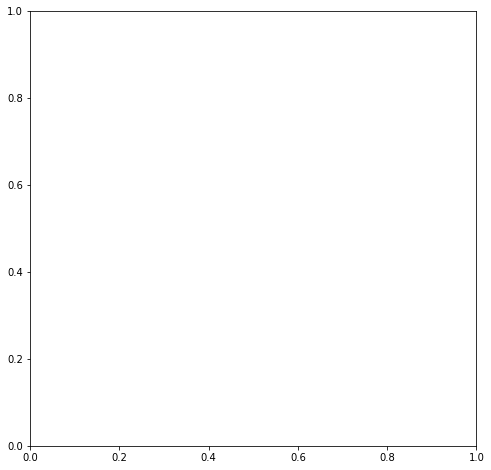

In [10]:

for i in range(0,20):
    x, y = [], []
    
    #Create new figure for each PC rotation being compared
    fig, ax = plt.subplots(figsize=(8,8))

    for sample in pcaDict.keys():
        x.append(pcaDict[sample][i])
        y.append(pcaDict[sample][i+1])
    
        #Get sample's breed
        breed = sampleBreedDict[sample]

        #Get color for breed
        if breed in colorDict.keys():
            COLOR = colorDict[breed]
        else:
            COLOR = 'black'
        #PLOT
        plt.scatter(pcaDict[sample][i],pcaDict[sample][i+1],color=COLOR,s=50,edgecolors='black')

    #All breeds
    breedsOfInterest = ['Boxer','Great_Dane']
    #No NGSD or boxers
    #breedsOfInterest = ['Great_Dane']
    for breed in breedsOfInterest:
        for sample in breeds[breed]:
            if 'zoey' in sample:
                continue
            COLOR = colorDict[breed]
            plt.scatter(pcaDict[sample][i],pcaDict[sample][i+1],color='white',s=50,edgecolors=COLOR,marker='D')

    #Add Zoey back in
    plt.scatter(pcaDict['zoey'][i],pcaDict['zoey'][i+1],color='white',s=400,edgecolors='darkmagenta',marker='*')
    
    #Tailor the plot
    plt.xlabel('PC %i' % (int(i)+1),fontweight='bold')
    plt.ylabel('PC %i' % (int(i)+2),fontweight='bold')
    
    #All breeds
    pltFile = plotDir + 'PC%i_PC%i_ShannonBreeds_ThreePerBreed.pdf' % ((int(i)+1),(int(i)+2))
    #No NGSD or boxers
    #pltFile = plotDir + 'PC%i_PC%i_ShannonBreeds_ThreePerBreed_NoNGSDBoxers.pdf' % ((int(i)+1),(int(i)+2))

    plt.savefig(pltFile)
    
    
    #break